In [1]:
# 코랩 한글 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,628 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings('ignore')


# 그래프 설정 - 한글이 깨지는걸 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

In [3]:
# 코랩 한글 설정
plt.rc('font' , family='NanumBarunGothic')

In [5]:
# 주피터
# df = pd.read_csv('./data/1안/jeju/제주특별자치도_주제8_유동인구 비율 대비 지역별 인기있는 업종 추천 데이터_매쉬업결과_20201215.csv', encoding='cp949')

# 코랩
df = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/제주특별자치도_주제8_유동인구 비율 대비 지역별 인기있는 업종 추천 데이터_매쉬업결과_20201215.csv', encoding='cp949')
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,데이터기준일자
0,2018-01,서귀포시,남원읍,건강보조식품 소매업,7,789000,15559582.61,2020-12-15
1,2018-01,서귀포시,남원읍,골프장 운영업,3277,484029251,15559582.61,2020-12-15
2,2018-01,서귀포시,남원읍,과실 및 채소 소매업,1251,103272305,15559582.61,2020-12-15
3,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61,2020-12-15
4,2018-01,서귀포시,남원읍,그외 기타 종합 소매업,9,5640000,15559582.61,2020-12-15
...,...,...,...,...,...,...,...,...
32963,2020-04,제주시,화북동,체인화 편의점,18360,160949430,24900108.87,2020-12-15
32964,2020-04,제주시,화북동,택시 운송업,62,409080,24900108.87,2020-12-15
32965,2020-04,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2664,44054440,24900108.87,2020-12-15
32966,2020-04,제주시,화북동,한식 음식점업,14709,543682195,24900108.87,2020-12-15


In [6]:
# 면세점 제거 

df[df['업종명'] == "면세점"].index
a = df[df['업종명'] == "면세점"].index
df.drop(index=a, inplace=True)
# df

In [7]:
#항공 운송업 제거

df[df['업종명'] == "정기 항공 운송업"].index
a_1 = df[df['업종명'] == "정기 항공 운송업"].index
df.drop(index=a_1, inplace=True)
# df

In [8]:
# 기타 갬블링 및 베팅업 제거 (카지노)

df[df['업종명'] == "기타 갬블링 및 베팅업"].index
a_2 = df[df['업종명'] == "기타 갬블링 및 베팅업"].index
df.drop(index=a_2, inplace=True)
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,데이터기준일자
0,2018-01,서귀포시,남원읍,건강보조식품 소매업,7,789000,15559582.61,2020-12-15
1,2018-01,서귀포시,남원읍,골프장 운영업,3277,484029251,15559582.61,2020-12-15
2,2018-01,서귀포시,남원읍,과실 및 채소 소매업,1251,103272305,15559582.61,2020-12-15
3,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61,2020-12-15
4,2018-01,서귀포시,남원읍,그외 기타 종합 소매업,9,5640000,15559582.61,2020-12-15
...,...,...,...,...,...,...,...,...
32963,2020-04,제주시,화북동,체인화 편의점,18360,160949430,24900108.87,2020-12-15
32964,2020-04,제주시,화북동,택시 운송업,62,409080,24900108.87,2020-12-15
32965,2020-04,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2664,44054440,24900108.87,2020-12-15
32966,2020-04,제주시,화북동,한식 음식점업,14709,543682195,24900108.87,2020-12-15


In [9]:
df[['업종명']].value_counts()

업종명                    
슈퍼마켓                       1204
과실 및 채소 소매업                1204
한식 음식점업                    1204
체인화 편의점                    1204
중식 음식점업                    1203
서양식 음식점업                   1188
수산물 소매업                    1186
여관업                        1184
비알콜 음료점업                   1180
스포츠 및 레크레이션 용품 임대업         1169
빵 및 과자류 소매업                1161
차량용 주유소 운영업                1148
육류 소매업                     1144
일식 음식점업                    1126
기타 외국식 음식점업                1086
기타음식료품위주종합소매업              1045
그외 기타 종합 소매업               1041
화장품 및 방향제 소매업              1035
피자, 햄버거, 샌드위치 및 유사 음식점업    1033
관광 민예품 및 선물용품 소매업          1030
욕탕업                        1023
전시 및 행사 대행업                1013
차량용 가스 충전업                  972
건강보조식품 소매업                  942
기타 주점업                      936
일반유흥 주점업                    828
여행사업                        731
호텔업                         644
그외 기타 스포츠시설 운영업             454
자동차 임대업                     417
골프장 운영업         

In [10]:
df.drop(['데이터기준일자'], axis=1, inplace=True)

In [11]:
aa = df['읍면동명'].unique()
aa

sam_list = pd.DataFrame()
for i in range(0,len(aa)):
    sam = df.query('읍면동명 == @aa[@i]').sample(3)
    sam_list = pd.concat([sam_list,sam], axis=0)
    df.drop(sam.index,inplace=True)

In [12]:
# 주피터
# sam_list.to_csv('./data/test2.csv', index=None, encoding='cp949')
# df.to_csv('./data/train2.csv', index=None, encoding='cp949')

# 코랩
sam_list.to_csv('/content/drive/MyDrive/프로젝트_3조/data/test2.csv', index=None, encoding='cp949')
df.to_csv('/content/drive/MyDrive/프로젝트_3조/data/train2.csv', index=None, encoding='cp949')

In [13]:
df.corr()

,이용자수,이용금액,총 유동인구
이용자수,1.000000,0.752074,0.246083
이용금액,0.752074,1.000000,0.231680
총 유동인구,0.246083,0.231680,1.000000


In [14]:
# 주피터
# df1 = pd.read_csv('./data/train2.csv', encoding='cp949')

# 코랩
df1 = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/train2.csv', encoding='cp949')
df1.drop(['년월'], axis=1, inplace=True)
df1

,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구
0,서귀포시,남원읍,건강보조식품 소매업,7,789000,15559582.61
1,서귀포시,남원읍,골프장 운영업,3277,484029251,15559582.61
2,서귀포시,남원읍,과실 및 채소 소매업,1251,103272305,15559582.61
3,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61
4,서귀포시,남원읍,그외 기타 종합 소매업,9,5640000,15559582.61
...,...,...,...,...,...,...
32621,제주시,화북동,체인화 편의점,18360,160949430,24900108.87
32622,제주시,화북동,택시 운송업,62,409080,24900108.87
32623,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2664,44054440,24900108.87
32624,제주시,화북동,한식 음식점업,14709,543682195,24900108.87


In [15]:
# 정보확인
df1. info()

# 결측치 확인
# True 1 False 0 
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32626 entries, 0 to 32625
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     32626 non-null  object 
 1   읍면동명    32626 non-null  object 
 2   업종명     32626 non-null  object 
 3   이용자수    32626 non-null  int64  
 4   이용금액    32626 non-null  int64  
 5   총 유동인구  32626 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


시도명       0
읍면동명      0
업종명       0
이용자수      0
이용금액      0
총 유동인구    0
dtype: int64

In [16]:
# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection  import cross_val_score

# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor


# 시간 측정을 위한 모듈 - 시간 측정 매우 중요 ! 
import datetime

# 저장을 위한 모듈
import pickle

In [17]:
# 문자열 → 숫자로 변환

encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

df1['시도명'] = encoder1.fit_transform(df1['시도명'])
df1['읍면동명'] = encoder2.fit_transform(df1['읍면동명'])
df1['업종명'] = encoder3.fit_transform(df1['업종명'])

In [18]:
# 입력과 결과로 나눈다.

X = df1.drop('이용금액', axis=1)
y = df1[['이용금액']]

display(X)
display(y)

,시도명,읍면동명,업종명,이용자수,총 유동인구
0,0,2,0,7,15559582.61
1,0,2,1,3277,15559582.61
2,0,2,2,1251,15559582.61
3,0,2,3,147,15559582.61
4,0,2,6,9,15559582.61
...,...,...,...,...,...
32621,1,41,32,18360,24900108.87
32622,1,41,33,62,24900108.87
32623,1,41,34,2664,24900108.87
32624,1,41,35,14709,24900108.87


,이용금액
0,789000
1,484029251
2,103272305
3,5320500
4,5640000
...,...
32621,160949430
32622,409080
32623,44054440
32624,543682195


In [19]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

scaler2 = StandardScaler()
scaler2.fit(y)
y = scaler2.transform(y)
y

array([[-0.42315127],
       [ 0.9463812 ],
       [-0.13270731],
       ...,
       [-0.30053436],
       [ 1.11544129],
       [-0.35028044]])

In [20]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

In [21]:
# KFlod 생성
kfold = KFold(n_splits = 10 , shuffle = True, random_state = 1)

In [22]:
# 사용할 모델들

model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
# model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)

model_list1 = [
    ('m1' , KNeighborsRegressor()),
    ('m2' , LinearRegression()),
    ('m3' , Ridge(random_state=1)),
    ('m4' , Lasso(random_state=1)),
    ('m5' , ElasticNet(random_state=1)),
#     ('m6' , SVR()),
    ('m7' , DecisionTreeRegressor(random_state=1)),
    ('m8' , RandomForestRegressor(random_state=1)),
    ('m9' , AdaBoostRegressor(random_state=1)),
    ('m10' , GradientBoostingRegressor(random_state=1)),
    ('m11' , LGBMRegressor(random_state=1)),
    ('m12' , XGBRegressor(random_state=1, silent=True, verbosity=0))
]

model13 = VotingRegressor(estimators=model_list1)

In [23]:
# 성능 값을 담을 리스트
score_list = []
# 학습 모델의 이름을 담을 리스트
model_name_list = []
# 최적으로 튜닝된 학습 모델을 담을 리스트
best_model_list = []

In [24]:
# 교차 검증을 수행할 학습 모델 리스트 ; model6 , 모델이름 - 'SVM (Basic)' 제외
check_list = [
    model1, model2, model3, model4, model5, model7,
    model8, model9, model10, model11, model12, model13
]
# 모델의 이름
check_name_list = [
    'KNN (Basic)' ,  'LinearRegression (Basic)' , 'Ridge (Basic)' ,
    'Lasso (Basic)' , 'ElasticNet (Basic)' ,
    'DecisionTree (Basic)' , 'RandomForest (Basic)' , 'AdaBoost (Basic)' ,
    'GradientBoosting (Basic)' , 'LGBM (Basic)' , 'XGBoost (Basic)' , 
    'Voting (Basic)'
]

In [25]:
# 교차 검증
for idx, ml in enumerate(check_list) :
    score = cross_val_score(ml, X_train, y_train, 
                            scoring='neg_mean_squared_error', cv=kfold)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 출력한다.
    print(f'{check_name_list[idx]} : {score.mean()}')
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(score.mean())
    model_name_list.append(check_name_list[idx])
    best_model_list.append(ml)

KNN (Basic) : -0.08141552080751362
LinearRegression (Basic) : -0.41879116392619153
Ridge (Basic) : -0.4187911135866716
Lasso (Basic) : -0.9384354401881311
ElasticNet (Basic) : -0.7618863632213309
DecisionTree (Basic) : -0.02176156029894094
RandomForest (Basic) : -0.013543733416291401
AdaBoost (Basic) : -0.6138957165274073
GradientBoosting (Basic) : -0.06497084364947639
LGBM (Basic) : -0.020737859152989844
XGBoost (Basic) : -0.06656089791740216
Voting (Basic) : -0.11761320718951662


In [26]:
# 튜닝하기 위해 사용할 파라미터 후보 값

parameter_list = [
    # KNN
    {
            # 확인할 주변 이웃의 개수
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # LinearRegression
    # LinearRegression은 튜닝할 하이퍼 파라미터가 없다.
    
    # Ridge
    {
       # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    #Lasso
    {
       # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # ElasticNet
    {
       # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },   
    
    # # SVM - 규제의 종류를 l2만 사용한다.
    # {
    #      # 규제의 강도
    #     'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    # },
    # DecisionTree (결정트리)-
    {
        # 생성될 최대 질문 깊이. 기본 None ( 무한대 )
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # GradientBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # LGBM
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # XGBoost
    {
        # 내부에서 사용할 알고리즘 종류(gbtree : 결정트리, gblinear : 선형모델)
        'booster' : ['gbtree', 'gblinear'],
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
]

In [27]:
# 사용할 모델들

model1 = KNeighborsRegressor()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
# model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)

In [28]:
# 교차 검증을 수행할 학습 모델 리스트 ; model6 , 모델이름 - 'SVM (Tuning)' 제외
check_list = [
    model1, model3, model4, model5, model7,
    model8, model9, model10, model11, model12
]
# 모델의 이름
check_name_list = [
    'KNN (Tuning)' , 'Ridge (Tuning)' ,
    'Lasso (Tuning)' , 'ElasticNet (Tuning)' ,
    'DecisionTree (Tuning)' , 'RandomForest (Tuning)' , 'AdaBoost (Tuning)' ,
    'GradientBoosting (Tuning)' , 'LGBM (Tuning)' , 'XGBoost (Tuning)' , 
]

In [29]:
## 하이퍼 파라미터 튜닝
for idx, ml in enumerate(check_list):
    grid1 = GridSearchCV(ml, param_grid=parameter_list[idx], 
                         scoring='neg_mean_squared_error', cv=kfold)
    grid1.fit(X_train, y_train)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(grid1.best_score_)
    model_name_list.append(check_name_list[idx])
    best_model_list.append(grid1.best_estimator_)
    
    print(f'{check_name_list[idx]} : {grid1.best_score_}')
    print(grid1.best_params_)

KNN (Tuning) : -0.036126941950035185
{'n_neighbors': 1}
Ridge (Tuning) : -0.41879078642797635
{'alpha': 10}
Lasso (Tuning) : -0.41879116392619153
{'alpha': 0}
ElasticNet (Tuning) : -0.41879113629372533
{'alpha': 0.0001}
DecisionTree (Tuning) : -0.02176156029894094
{'max_depth': None}
RandomForest (Tuning) : -0.01319899699961942
{'n_estimators': 150}
AdaBoost (Tuning) : -0.25295389820341413
{'learning_rate': 0.0001, 'n_estimators': 100}
GradientBoosting (Tuning) : -0.03454193120505677
{'learning_rate': 0.1, 'n_estimators': 300}
LGBM (Tuning) : -0.01566791959163369
{'learning_rate': 0.1, 'n_estimators': 300}
XGBoost (Tuning) : -0.027473734217261105
{'booster': 'gbtree', 'learning_rate': 1, 'n_estimators': 300}


In [31]:
model_list1 = [
    ('m1' , best_model_list[13]),
    ('m2' , best_model_list[14]),
    ('m3' , best_model_list[15]),
    ('m4' , best_model_list[16]),
    ('m5' , best_model_list[17]),
#     ('m6' , best_model_list[18]),
    ('m7' , best_model_list[19]),
    ('m8' , best_model_list[20]),
    ('m9' , best_model_list[21]),
    # ('m10' , best_model_list[22]),
    # ('m11' , best_model_list[23])
]
# m10, m11 오류생겨서 주석처리함. 주석처리하니까 실행됨~
model13 = VotingRegressor(estimators=model_list1)

In [32]:
# 튜닝된 모델로 구성된 보팅 모델들을 교차 검증한다.

score1 = cross_val_score(model13, X_train, y_train, 
                         scoring='neg_mean_squared_error', cv = kfold)

score_list.append(score1.mean())

model_name_list.append('Voting (Tuning)')

best_model_list.append(model13)

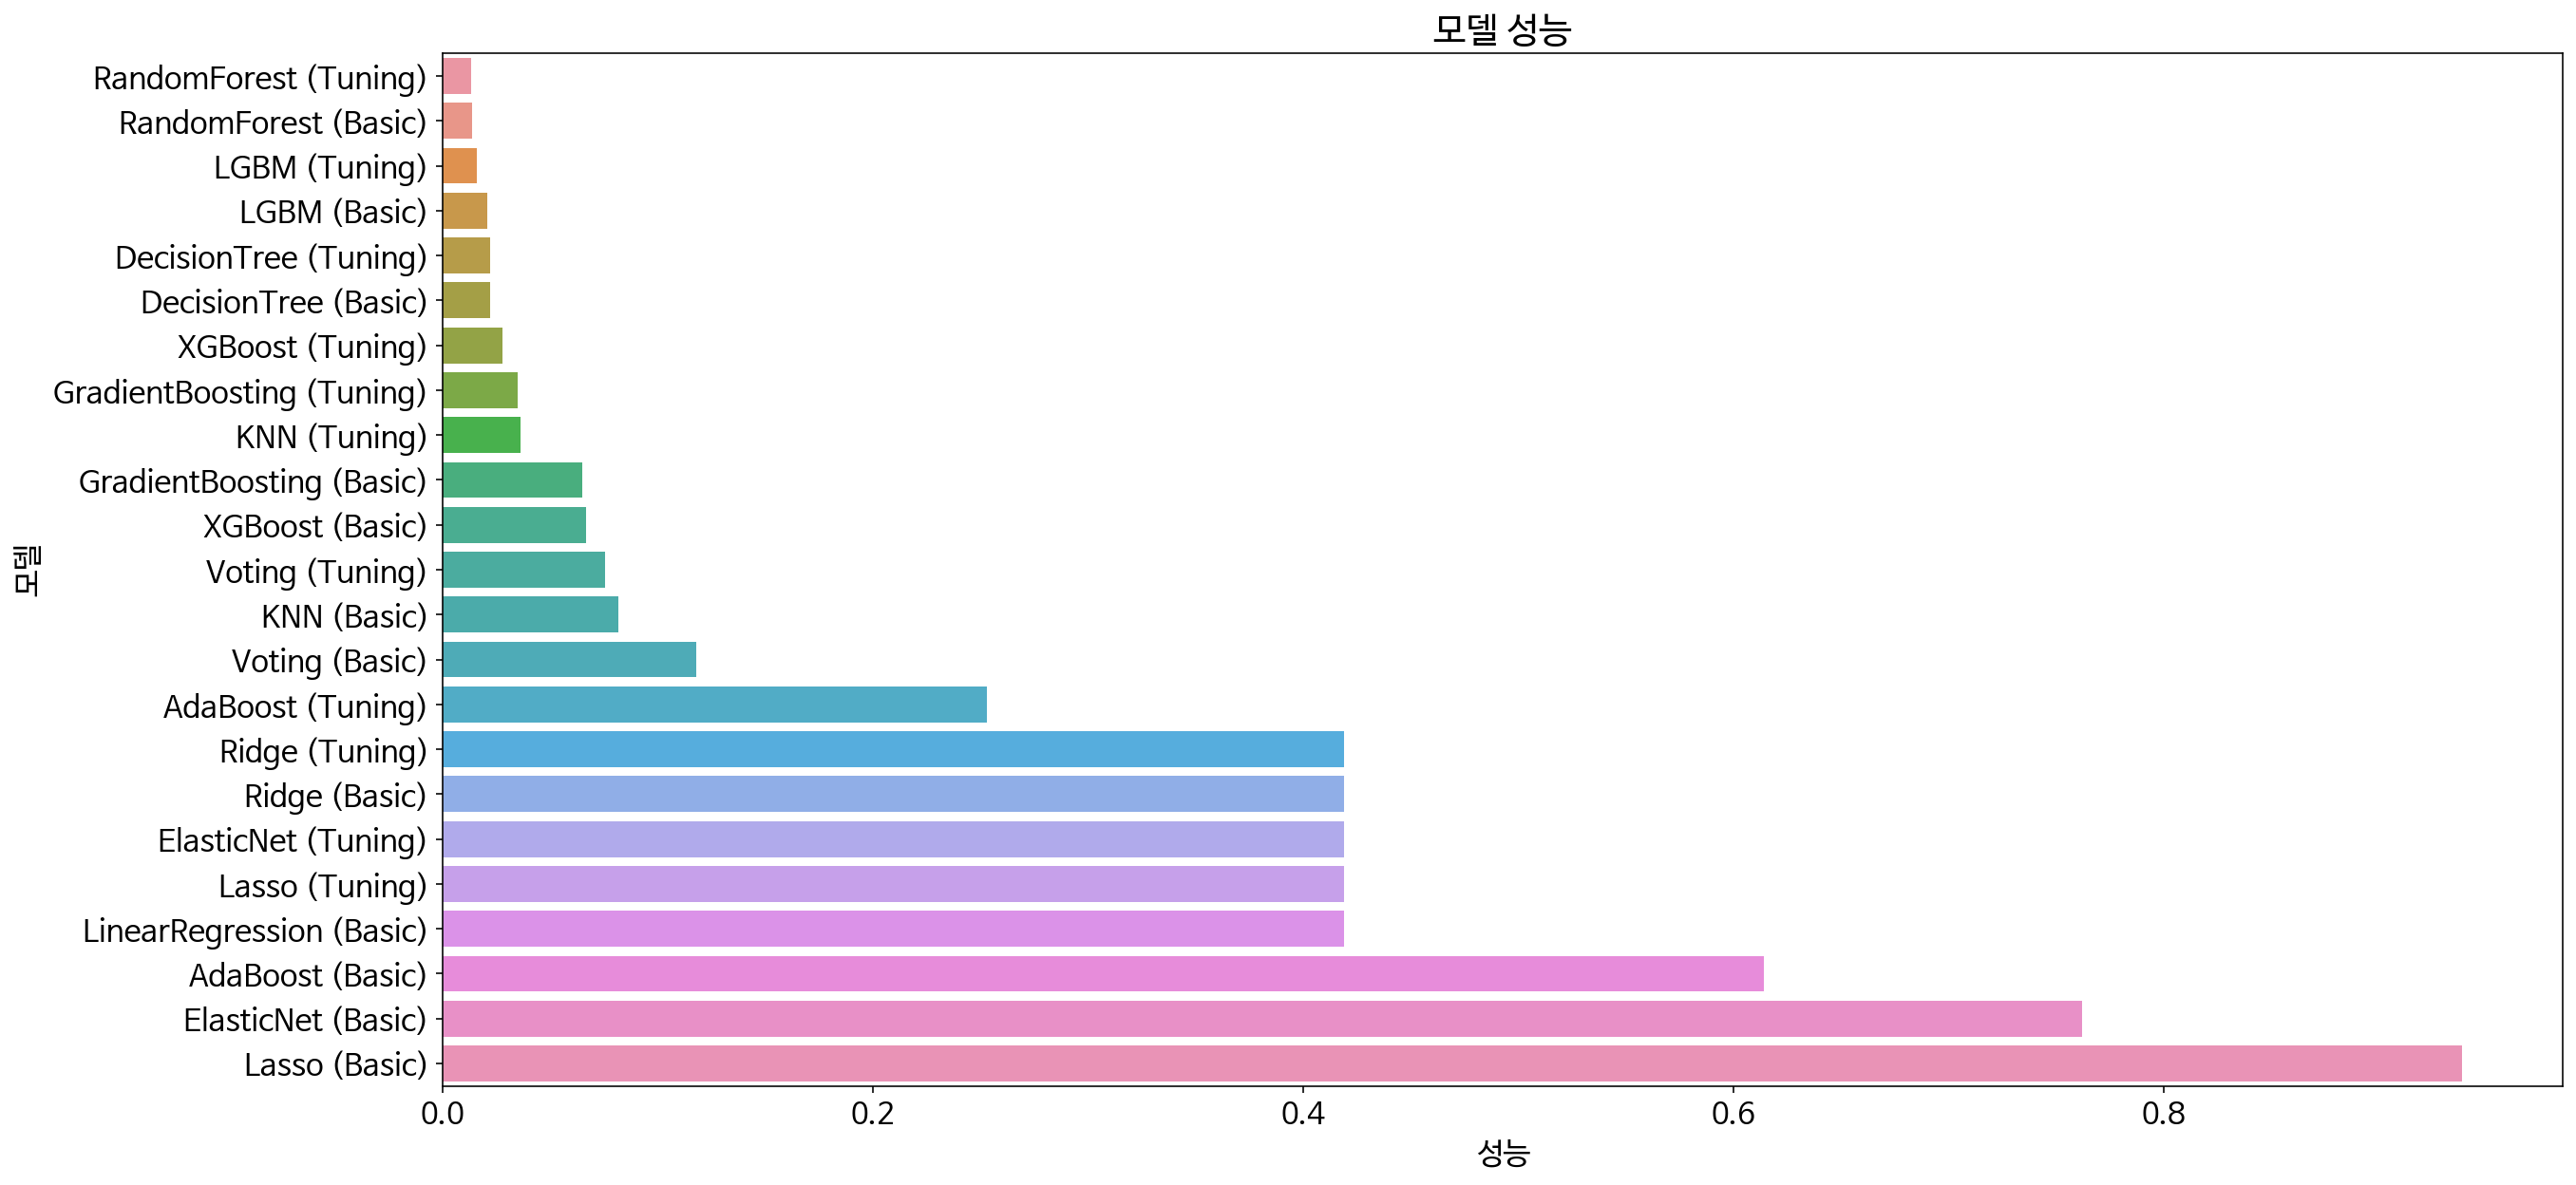

In [33]:
# 결과를 시각화한다.

d1 = {
    'model_name' : model_name_list,
    'score' : score_list
}

result_df = pd.DataFrame(d1)
# 절대값으로 변환 ; abs( 데이터 )
result_df['score'] = abs(result_df['score'])

result_df.sort_values(by='score',  inplace=True)
sns.barplot(data=result_df, x='score', y='model_name')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.show()

In [34]:
# 각 모델로부터 검증 데이터에 대한 평가를 실시한다.
# 전체 모델을 X_train으로 학습을 진행한다.
for ml in best_model_list :
    ml.fit(X_train, y_train)

In [35]:
# 검증 데이터를 통해 예측 결과를 가져온다.
predict_list = []

for ml in best_model_list :
    pred = ml.predict(X_test)
    predict_list.append(pred)

In [36]:
# r2를 측정해본다. - r2 클수록 좋음
accuray_list = []

for pred in predict_list :
    r1 = r2_score(pred, y_test)
    accuray_list.append(r1)

,model_name,r2
6,RandomForest (Basic),0.988586
17,RandomForest (Tuning),0.988554
20,LGBM (Tuning),0.987507
9,LGBM (Basic),0.983229
5,DecisionTree (Basic),0.979608
16,DecisionTree (Tuning),0.979608
21,XGBoost (Tuning),0.974664
19,GradientBoosting (Tuning),0.964689
12,KNN (Tuning),0.958499
10,XGBoost (Basic),0.927222


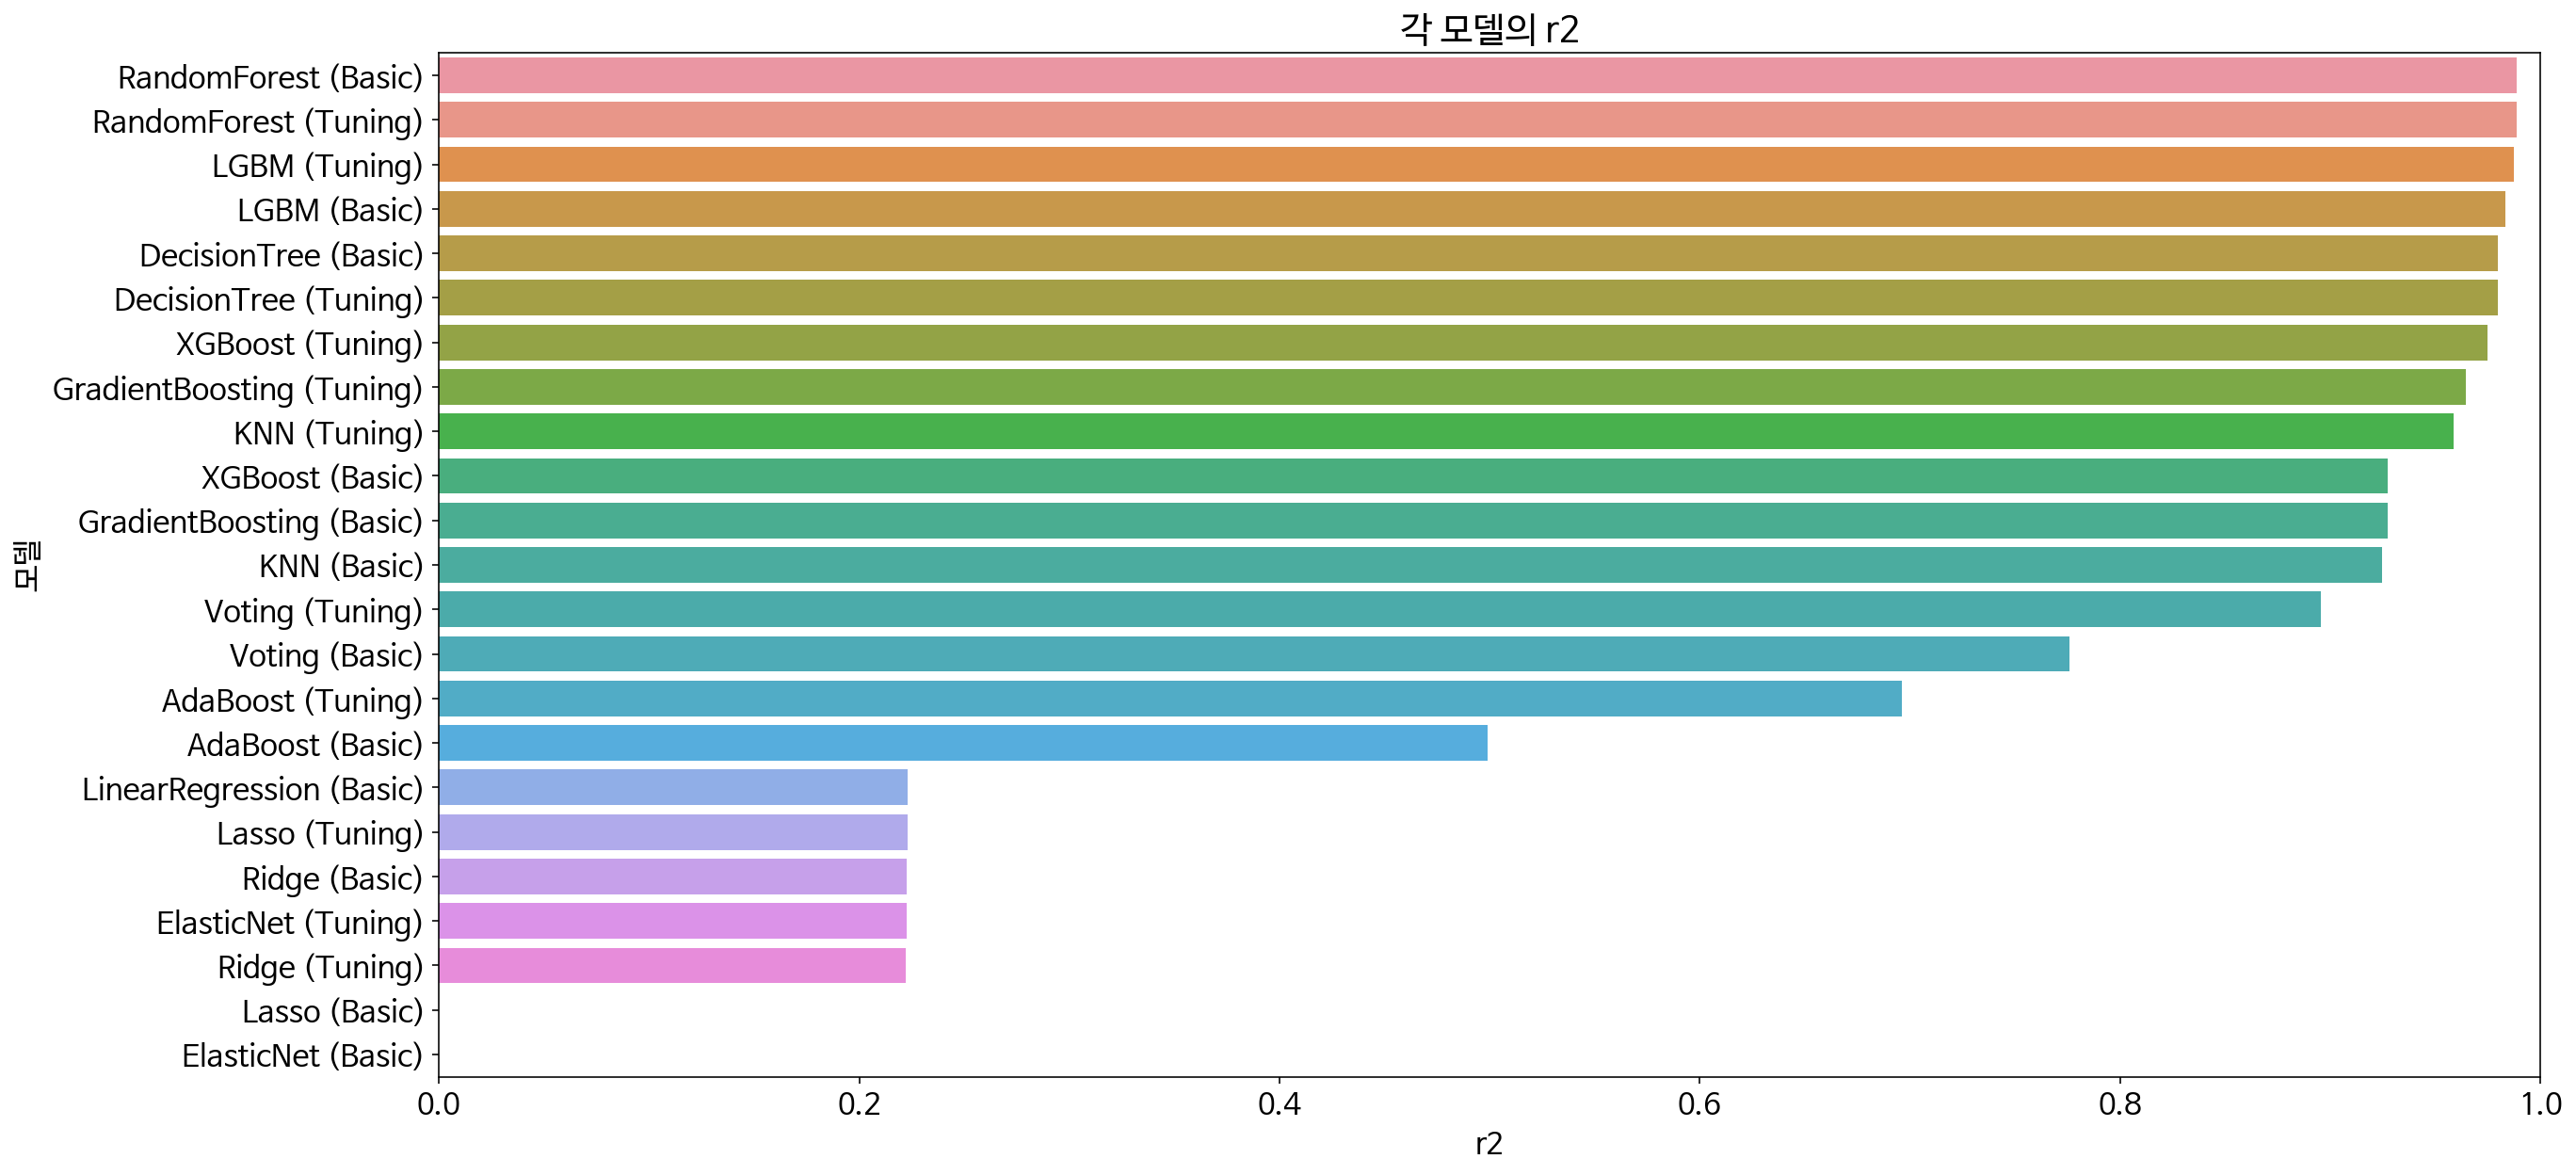

In [37]:
# r2를 시각화한다. - 1과 가까운 수치가 좋음
d100 = {
    'model_name' : model_name_list,
    'r2' : accuray_list
}

df100 = pd.DataFrame(d100)
df100.sort_values(by='r2', ascending=False, inplace=True)
display(df100)
sns.barplot(data=df100, x='r2', y='model_name')
plt.title('각 모델의 r2')
plt.xlabel('r2')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

In [38]:
# 진짜 결과와 예측 결과의 패턴을 비교한다.
# y_test.values 에서 values 삭제
# 입력 결과 나눌때 모양 바꿔줬기때문.

for idx, pred in enumerate (predict_list) :
    plt.plot(y_test, label='원본')
    plt.plot(pred, label='예측')
    plt.title(model_name_list[idx])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
# best 
best_model_list
enumerate(best_model_list)
list(enumerate(best_model_list))

[(0, KNeighborsRegressor()),
 (1, LinearRegression()),
 (2, Ridge(random_state=1)),
 (3, Lasso(random_state=1)),
 (4, ElasticNet(random_state=1)),
 (5, DecisionTreeRegressor(random_state=1)),
 (6, RandomForestRegressor(random_state=1)),
 (7, AdaBoostRegressor(random_state=1)),
 (8, GradientBoostingRegressor(random_state=1)),
 (9, LGBMRegressor(random_state=1)),
 (10, XGBRegressor(random_state=1, silent=True, verbosity=0)),
 (11, VotingRegressor(estimators=[('m1', KNeighborsRegressor()),
                              ('m2', LinearRegression()),
                              ('m3', Ridge(random_state=1)),
                              ('m4', Lasso(random_state=1)),
                              ('m5', ElasticNet(random_state=1)),
                              ('m7', DecisionTreeRegressor(random_state=1)),
                              ('m8', RandomForestRegressor(random_state=1)),
                              ('m9', AdaBoostRegressor(random_state=1)),
                              ('m10

In [40]:
# 모델 선정
# best_model_list[] 번호 입력 긔긔

best_model = best_model_list[17]
best_model

RandomForestRegressor(n_estimators=150, random_state=1)

In [41]:
# 선정된 모델에 전체 데이터를 학습한다.
best_model.fit(X, y)

RandomForestRegressor(n_estimators=150, random_state=1)

In [42]:
# 모델 저장

with open('./2_1(RF).dat', 'wb') as fp :
    pickle.dump(best_model, fp)
    
    pickle.dump(scaler1, fp)
    pickle.dump(scaler2, fp)
    
    pickle.dump(encoder1, fp)
    pickle.dump(encoder2, fp)
    pickle.dump(encoder3, fp)

# 예측

In [43]:
# 복원한다.
# 학습할때 사용한 스케일러와 인코딩도 동일하게 불러와야함.

with open('./2_1(RF).dat', 'rb') as fp :
    model100 = pickle.load(fp)
    
    scaler100 = pickle.load(fp)
    scaler200 = pickle.load(fp)
    
    encoder100 = pickle.load(fp)
    encoder200 = pickle.load(fp)
    encoder300 = pickle.load(fp)

print(model100)
print(scaler100)
print(scaler200)
print(encoder100)
print(encoder200)
print(encoder300)

RandomForestRegressor(n_estimators=150, random_state=1)
StandardScaler()
StandardScaler()
LabelEncoder()
LabelEncoder()
LabelEncoder()


In [45]:
# 예측할 데이터를 불러온다.
# 주피터
# df2 = pd.read_csv('./data/test2.csv', encoding='cp949')

# 코랩
df2 = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/test2.csv', encoding='cp949')

df2.drop(['년월'], axis=1, inplace=True)
df2

,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구
0,서귀포시,남원읍,그외 기타 종합 소매업,11,5380000,15039370.32
1,서귀포시,남원읍,그외 기타 스포츠시설 운영업,4,1330000,14703637.48
2,서귀포시,남원읍,비알콜 음료점업,1285,15136220,16801997.61
3,서귀포시,대륜동,슈퍼마켓,3130,76179770,16581071.72
4,서귀포시,대륜동,욕탕업,71,4222500,15299842.48
...,...,...,...,...,...,...
124,제주시,한림읍,기타 주점업,277,57793130,21445184.25
125,제주시,한림읍,기타 주점업,254,52006000,19655084.16
126,제주시,화북동,비알콜 음료점업,3215,28806150,25313413.13
127,제주시,화북동,전시 및 행사 대행업,34,734100,25372032.60


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     129 non-null    object 
 1   읍면동명    129 non-null    object 
 2   업종명     129 non-null    object 
 3   이용자수    129 non-null    int64  
 4   이용금액    129 non-null    int64  
 5   총 유동인구  129 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.2+ KB


In [47]:
# 문자열 → 숫자로 변환
# fit 다시 학습하면 안됨 ! 

df2['시도명'] = encoder100.transform(df2['시도명'])
df2['읍면동명'] = encoder200.transform(df2['읍면동명'])
df2['업종명'] = encoder300.transform(df2['업종명'])

In [48]:
# 입력과 결과로 나눈다.

X = df2.drop('이용금액', axis=1)
y = df2[['이용금액']]

display(X)
display(y)

,시도명,읍면동명,업종명,이용자수,총 유동인구
0,0,2,6,11,15039370.32
1,0,2,5,4,14703637.48
2,0,2,15,1285,16801997.61
3,0,4,19,3130,16581071.72
4,0,4,23,71,15299842.48
...,...,...,...,...,...
124,1,40,10,277,21445184.25
125,1,40,10,254,19655084.16
126,1,41,15,3215,25313413.13
127,1,41,28,34,25372032.60


,이용금액
0,5380000
1,1330000
2,15136220
3,76179770
4,4222500
...,...
124,57793130
125,52006000
126,28806150
127,734100


In [49]:
# 표준화.
X2 = scaler100.transform(X)
X2

array([[-1.22227704e+00, -1.51971850e+00, -1.30235315e+00,
        -4.02757484e-01, -1.53944285e-01],
       [-1.22227704e+00, -1.51971850e+00, -1.39548235e+00,
        -4.03513891e-01, -1.77320246e-01],
       [-1.22227704e+00, -1.51971850e+00, -4.64190273e-01,
        -2.65091414e-01, -3.12184078e-02],
       [-1.22227704e+00, -1.35764871e+00, -9.16734399e-02,
        -6.57241461e-02, -4.66007429e-02],
       [-1.22227704e+00, -1.35764871e+00,  2.80843393e-01,
        -3.96273995e-01, -1.35808475e-01],
       [-1.22227704e+00, -1.35764871e+00, -9.29836314e-01,
        -4.03405833e-01, -2.92340009e-02],
       [-1.22227704e+00, -1.27661382e+00, -1.02296552e+00,
        -3.85684298e-01, -2.91802735e-02],
       [-1.22227704e+00, -1.27661382e+00,  7.46489434e-01,
        -3.84387600e-01, -4.58997791e-02],
       [-1.22227704e+00, -1.27661382e+00, -9.16734399e-02,
         1.41348373e+00, -6.55354233e-02],
       [-1.22227704e+00, -1.19557892e+00, -1.39548235e+00,
        -4.03513891e-01

In [50]:
# 예측한다.
pred = model100.predict(X2)
pred

array([-0.41044636, -0.42098979, -0.37195661, -0.21004181, -0.41393677,
       -0.42316549, -0.4142146 , -0.41895234,  1.45040577, -0.42341573,
       -0.24373904,  0.69145579, -0.41820471, -0.29681048, -0.21829694,
       -0.41633358, -0.4211679 , -0.41331376, -0.35872355, -0.30830622,
       -0.16815746,  0.8723351 , -0.26909365, -0.12010097, -0.20642157,
       -0.40660279, -0.38989175, -0.29997474, -0.39249882, -0.36211355,
       -0.30677126, -0.42210814, -0.42479516,  0.58269384, -0.42414451,
        0.52168984, -0.39760541, -0.32755586, -0.42327632, -0.4204722 ,
       -0.36734132, -0.08985619, -0.13202176, -0.27400441,  0.06483907,
       -0.18932621, -0.33788941, -0.36886164, -0.41747248, -0.41009898,
       -0.06361196, -0.41682582, -0.12509079, -0.37474561,  2.05651789,
       -0.42290281, -0.36717977, -0.18171231, -0.04324227, -0.03775012,
       -0.36491983, -0.42191006, -0.42298248, -0.42157924, -0.42259129,
       -0.03801818, -0.37555313, -0.40976105, -0.3932292 ,  0.03

In [51]:
# 예측값을 되돌린다.
pred = pred.reshape(-1, 1)
pred1 = scaler200.inverse_transform(pred)
pred1

array([[5.27193333e+06],
       [1.55167944e+06],
       [1.88530608e+07],
       [7.59847851e+07],
       [4.04033964e+06],
       [7.83983667e+05],
       [3.94231000e+06],
       [2.27059333e+06],
       [6.61874585e+08],
       [6.95686667e+05],
       [6.40947000e+07],
       [3.94078685e+08],
       [2.53439667e+06],
       [4.53684145e+07],
       [7.30719585e+07],
       [3.19462649e+06],
       [1.48883181e+06],
       [4.26017096e+06],
       [2.35223548e+07],
       [4.13121363e+07],
       [9.07636986e+07],
       [4.57902045e+08],
       [5.51483129e+07],
       [1.07720458e+08],
       [7.72621880e+07],
       [6.62813977e+06],
       [1.25246380e+07],
       [4.42519043e+07],
       [1.16047327e+07],
       [2.23261927e+07],
       [4.18537482e+07],
       [1.15707000e+06],
       [2.08953333e+05],
       [3.55701974e+08],
       [4.38536000e+05],
       [3.34176681e+08],
       [9.80287085e+06],
       [3.45198901e+07],
       [7.44874133e+05],
       [1.73430933e+06],


In [52]:
# 예측할 원본 데이터에 추가.
# 코랩
df_result = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/test2.csv', encoding='cp949')
df_result.drop(['년월'], axis=1, inplace=True)
df_result['예측'] = pred1
df_result

,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,예측
0,서귀포시,남원읍,그외 기타 종합 소매업,11,5380000,15039370.32,5.271933e+06
1,서귀포시,남원읍,그외 기타 스포츠시설 운영업,4,1330000,14703637.48,1.551679e+06
2,서귀포시,남원읍,비알콜 음료점업,1285,15136220,16801997.61,1.885306e+07
3,서귀포시,대륜동,슈퍼마켓,3130,76179770,16581071.72,7.598479e+07
4,서귀포시,대륜동,욕탕업,71,4222500,15299842.48,4.040340e+06
...,...,...,...,...,...,...,...
124,제주시,한림읍,기타 주점업,277,57793130,21445184.25,5.842987e+07
125,제주시,한림읍,기타 주점업,254,52006000,19655084.16,5.361430e+07
126,제주시,화북동,비알콜 음료점업,3215,28806150,25313413.13,2.474574e+07
127,제주시,화북동,전시 및 행사 대행업,34,734100,25372032.60,1.044461e+06


In [53]:
df_result[['이용금액', '예측']]

,이용금액,예측
0,5380000,5.271933e+06
1,1330000,1.551679e+06
2,15136220,1.885306e+07
3,76179770,7.598479e+07
4,4222500,4.040340e+06
...,...,...
124,57793130,5.842987e+07
125,52006000,5.361430e+07
126,28806150,2.474574e+07
127,734100,1.044461e+06


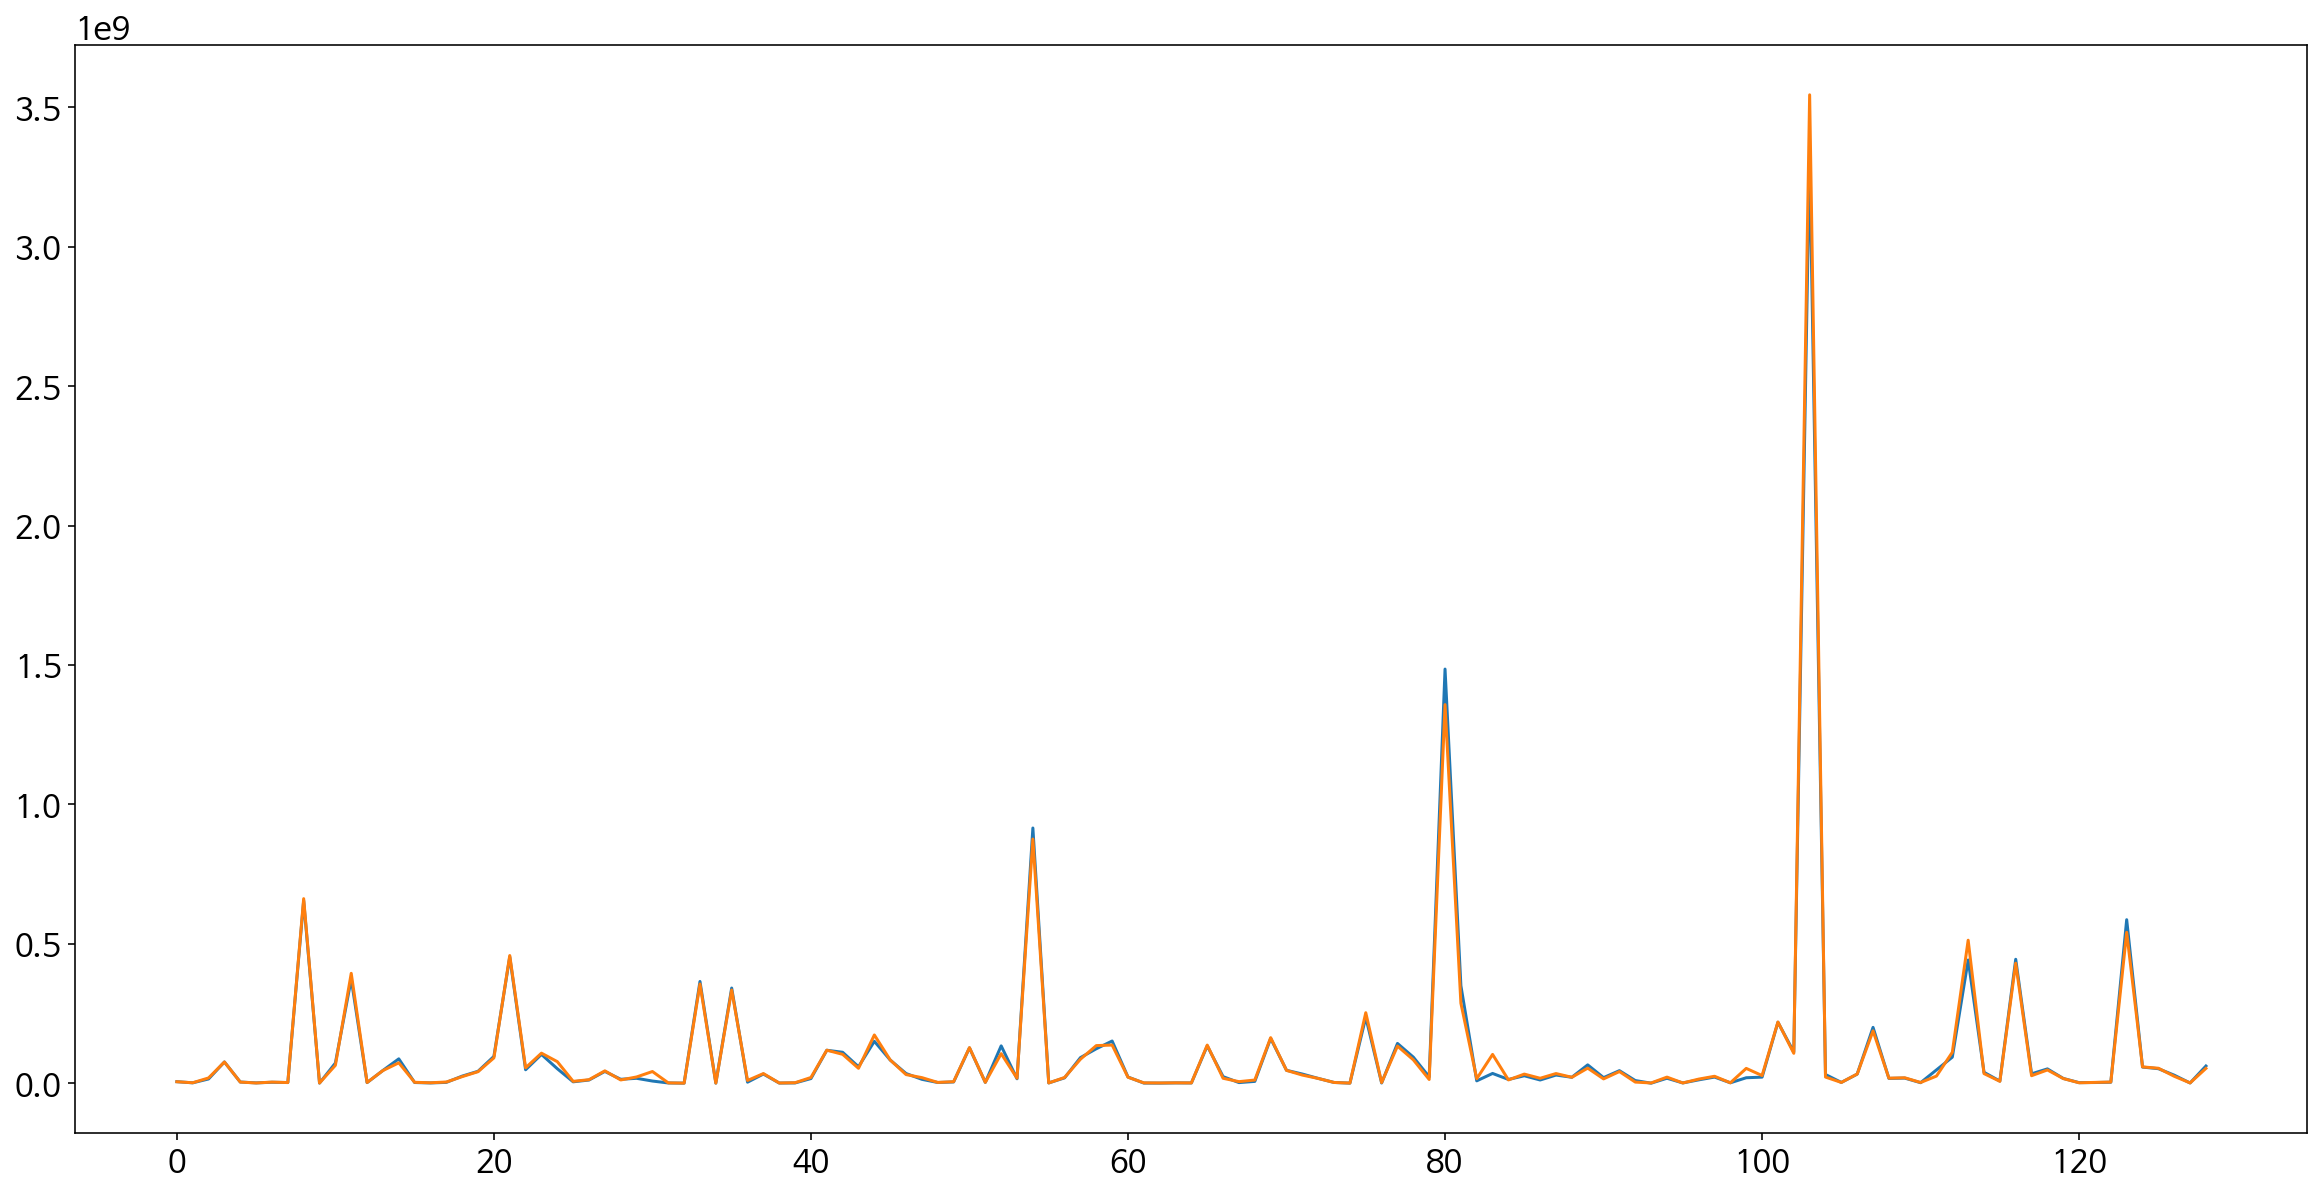

In [54]:
plt.plot(df_result['이용금액'])
plt.plot(df_result['예측'])
plt.show()

## 상위 6개 

In [57]:
# 예측할 데이터를 불러온다.
# 코랩
df3 = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/test2.csv', encoding='cp949')
df3.drop(['년월'], axis=1, inplace=True)
df3.drop('이용금액', axis=1, inplace=True)
df3

,시도명,읍면동명,업종명,이용자수,총 유동인구
0,서귀포시,남원읍,그외 기타 종합 소매업,11,15039370.32
1,서귀포시,남원읍,그외 기타 스포츠시설 운영업,4,14703637.48
2,서귀포시,남원읍,비알콜 음료점업,1285,16801997.61
3,서귀포시,대륜동,슈퍼마켓,3130,16581071.72
4,서귀포시,대륜동,욕탕업,71,15299842.48
...,...,...,...,...,...
124,제주시,한림읍,기타 주점업,277,21445184.25
125,제주시,한림읍,기타 주점업,254,19655084.16
126,제주시,화북동,비알콜 음료점업,3215,25313413.13
127,제주시,화북동,전시 및 행사 대행업,34,25372032.60


In [58]:
df3['시도명'] = encoder1.transform(df3['시도명'])
df3['읍면동명'] = encoder2.transform(df3['읍면동명'])
df3['업종명'] = encoder3.transform(df3['업종명'])

df3 = scaler1.transform(df3)
df3

array([[-1.22227704e+00, -1.51971850e+00, -1.30235315e+00,
        -4.02757484e-01, -1.53944285e-01],
       [-1.22227704e+00, -1.51971850e+00, -1.39548235e+00,
        -4.03513891e-01, -1.77320246e-01],
       [-1.22227704e+00, -1.51971850e+00, -4.64190273e-01,
        -2.65091414e-01, -3.12184078e-02],
       [-1.22227704e+00, -1.35764871e+00, -9.16734399e-02,
        -6.57241461e-02, -4.66007429e-02],
       [-1.22227704e+00, -1.35764871e+00,  2.80843393e-01,
        -3.96273995e-01, -1.35808475e-01],
       [-1.22227704e+00, -1.35764871e+00, -9.29836314e-01,
        -4.03405833e-01, -2.92340009e-02],
       [-1.22227704e+00, -1.27661382e+00, -1.02296552e+00,
        -3.85684298e-01, -2.91802735e-02],
       [-1.22227704e+00, -1.27661382e+00,  7.46489434e-01,
        -3.84387600e-01, -4.58997791e-02],
       [-1.22227704e+00, -1.27661382e+00, -9.16734399e-02,
         1.41348373e+00, -6.55354233e-02],
       [-1.22227704e+00, -1.19557892e+00, -1.39548235e+00,
        -4.03513891e-01

In [59]:
# r2 상위 6개로 예측 돌리기

idx = df100.head(6).index
m_list = []
for i in idx:
  a = best_model_list[i]
  m_list.append(a)

for i in list(m_list):
  print(i)

RandomForestRegressor(random_state=1)
RandomForestRegressor(n_estimators=150, random_state=1)
LGBMRegressor(n_estimators=300, random_state=1)
LGBMRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)


In [60]:
pred1 = m_list[0].predict(df3)
pred2 = m_list[1].predict(df3)
pred3 = m_list[2].predict(df3)
pred4 = m_list[3].predict(df3)
pred5 = m_list[4].predict(df3)
pred6 = m_list[5].predict(df3)

pred1 = pred1.reshape(-1, 1)
pred2 = pred2.reshape(-1, 1)
pred3 = pred3.reshape(-1, 1)
pred4 = pred4.reshape(-1, 1)
pred5 = pred5.reshape(-1, 1)
pred6 = pred6.reshape(-1, 1)
pred1 = scaler2.inverse_transform(pred1)
pred2 = scaler2.inverse_transform(pred2)
pred3 = scaler2.inverse_transform(pred3)
pred4 = scaler2.inverse_transform(pred4)
pred5 = scaler2.inverse_transform(pred5)
pred6 = scaler2.inverse_transform(pred6)

# 예측할 원본 데이터에 붙혀준다.
df_result = pd.read_csv('/content/drive/MyDrive/프로젝트_3조/data/test2.csv', encoding='cp949')
df_result.drop(['년월'], axis=1, inplace=True)
df_result['예측1'] = pred1
df_result['예측2'] = pred2
df_result['예측3'] = pred3
df_result['예측4'] = pred4
df_result['예측5'] = pred5
df_result['예측6'] = pred6
df_result

,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,예측1,예측2,예측3,예측4,예측5,예측6
0,서귀포시,남원읍,그외 기타 종합 소매업,11,5380000,15039370.32,4891020.00,5.271933e+06,4.388481e+06,6.022003e+06,1480000.0,1480000.0
1,서귀포시,남원읍,그외 기타 스포츠시설 운영업,4,1330000,14703637.48,1964675.20,1.551679e+06,1.431516e+06,3.815239e+06,2310200.0,2310200.0
2,서귀포시,남원읍,비알콜 음료점업,1285,15136220,16801997.61,18184805.80,1.885306e+07,2.486328e+07,3.072915e+07,23038680.0,23038680.0
3,서귀포시,대륜동,슈퍼마켓,3130,76179770,16581071.72,76776239.51,7.598479e+07,8.098205e+07,8.424967e+07,82494898.0,82494898.0
4,서귀포시,대륜동,욕탕업,71,4222500,15299842.48,2960147.94,4.040340e+06,8.404042e+05,2.859406e+06,1751500.0,1751500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,제주시,한림읍,기타 주점업,277,57793130,21445184.25,57911344.54,5.842987e+07,5.159911e+07,5.197452e+07,57222000.0,57222000.0
125,제주시,한림읍,기타 주점업,254,52006000,19655084.16,52985799.72,5.361430e+07,4.904341e+07,4.871594e+07,51946410.0,51946410.0
126,제주시,화북동,비알콜 음료점업,3215,28806150,25313413.13,26318729.81,2.474574e+07,2.501747e+07,3.027294e+07,23499450.0,23499450.0
127,제주시,화북동,전시 및 행사 대행업,34,734100,25372032.60,1102886.41,1.044461e+06,1.443409e+06,7.532383e+05,753300.0,753300.0


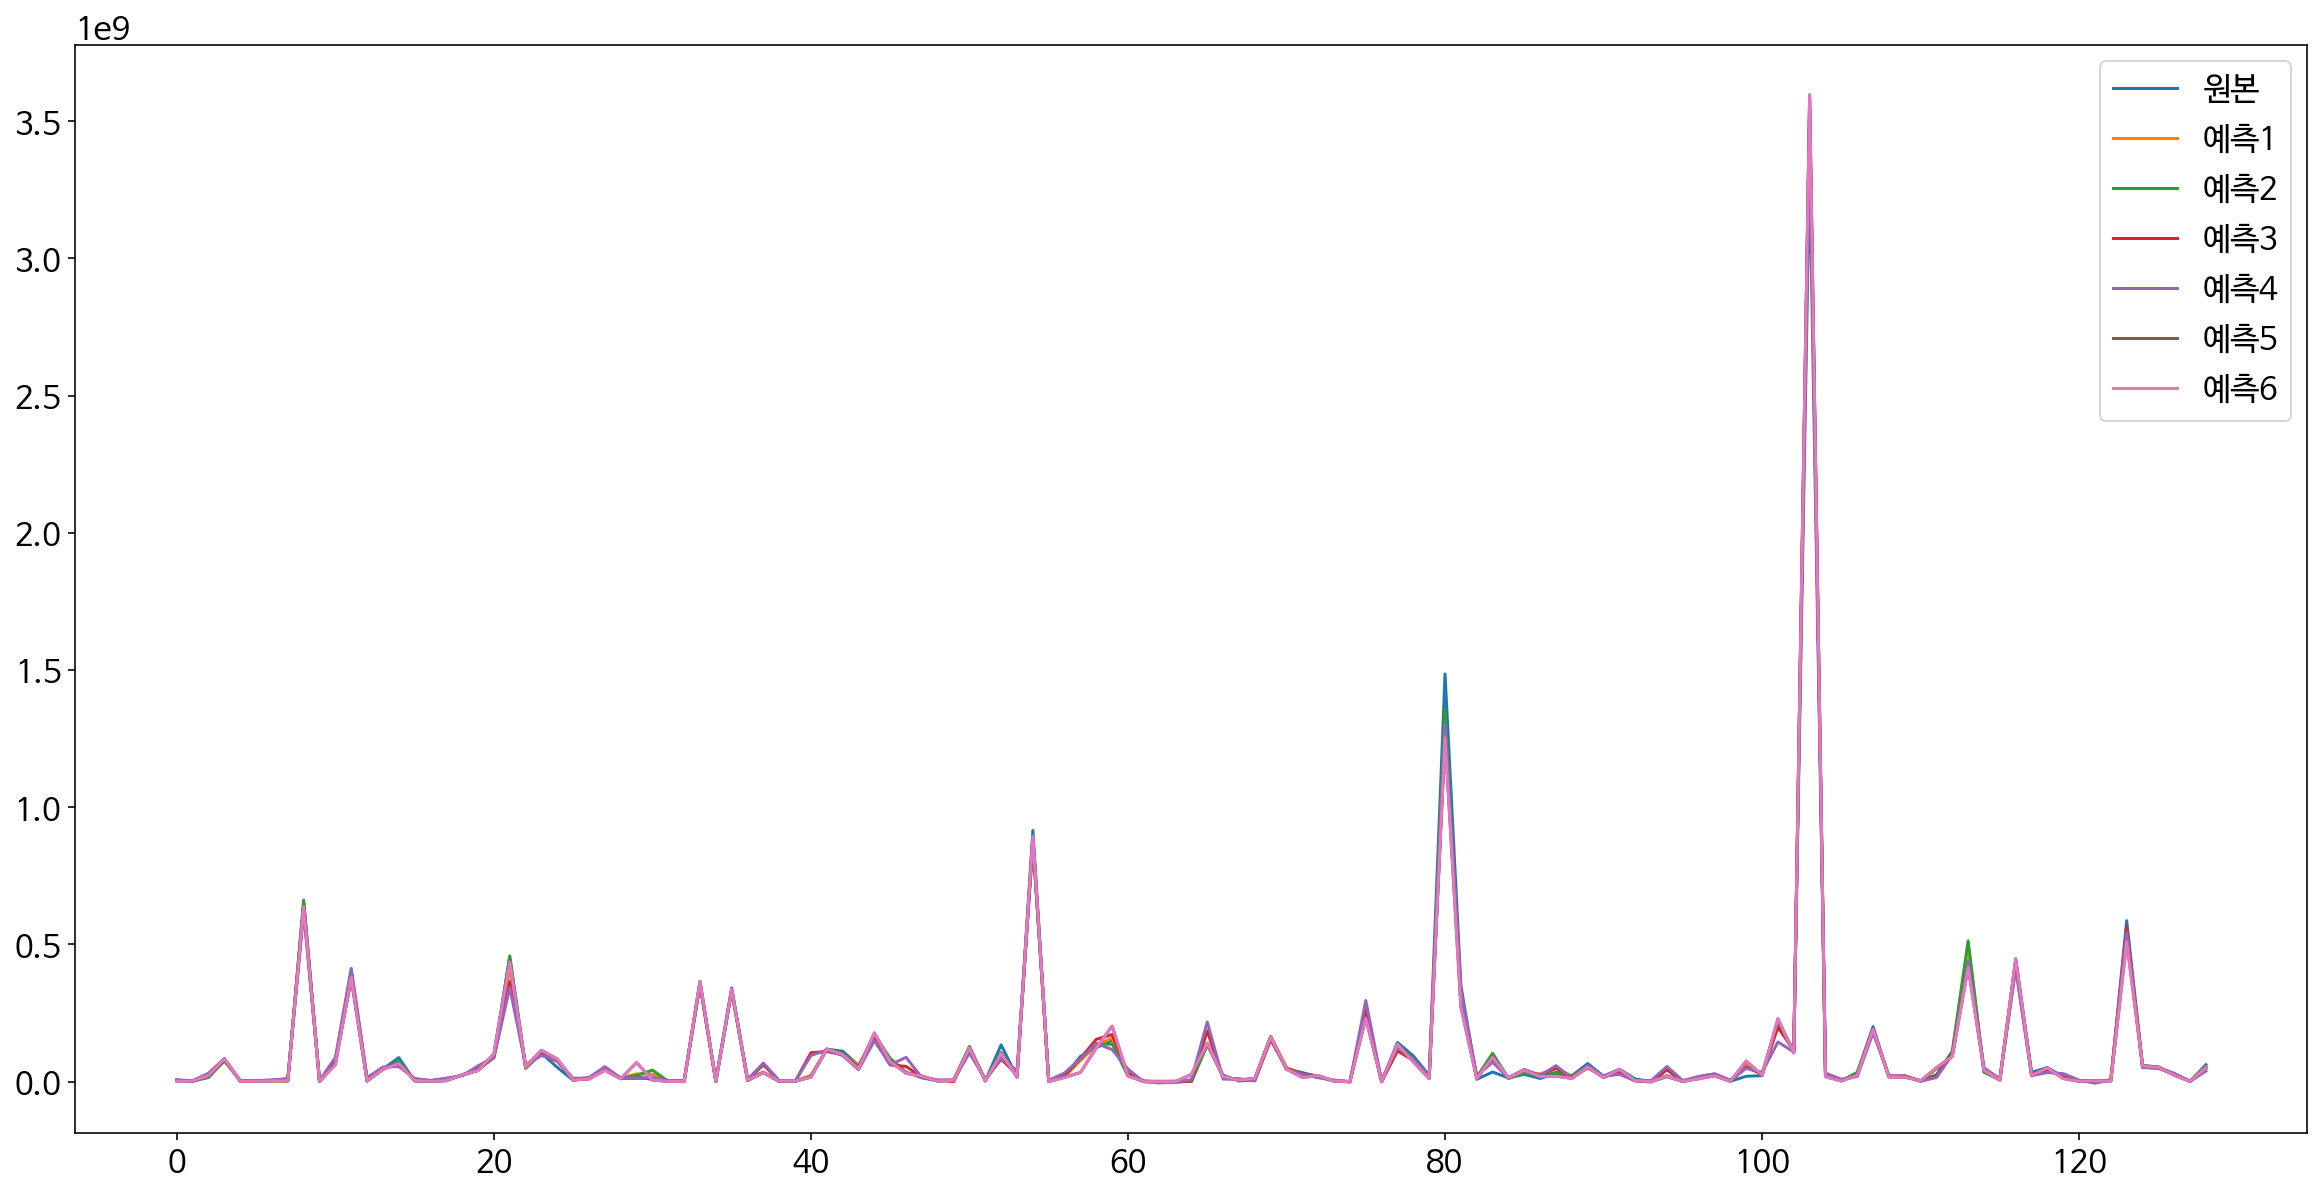

In [61]:
plt.plot(df_result['이용금액'], label='원본')
plt.plot(df_result['예측1'], label='예측1')
plt.plot(df_result['예측2'], label='예측2')
plt.plot(df_result['예측3'], label='예측3')
plt.plot(df_result['예측4'], label='예측4')
plt.plot(df_result['예측5'], label='예측5')
plt.plot(df_result['예측6'], label='예측6')
plt.legend()
plt.show()

In [62]:
df_result
df_result['오차1'] = (df_result['이용금액'] - df_result['예측1']).abs().mean()
df_result['오차2'] = (df_result['이용금액'] - df_result['예측2']).abs().mean()
df_result['오차3'] = (df_result['이용금액'] - df_result['예측3']).abs().mean()
df_result['오차4'] = (df_result['이용금액'] - df_result['예측4']).abs().mean()
df_result['오차5'] = (df_result['이용금액'] - df_result['예측5']).abs().mean()
df_result['오차6'] = (df_result['이용금액'] - df_result['예측6']).abs().mean()

list1 = [
    df_result['오차1'].mean(),
    df_result['오차2'].mean(),
    df_result['오차3'].mean(),
    df_result['오차4'].mean(),
    df_result['오차5'].mean(),
    df_result['오차6'].mean()
]
list1

[9991637.10881138,
 9425108.373488368,
 14352544.359654043,
 16199113.424256982,
 12051551.100775184,
 12051551.100775184]

In [65]:
# 오차값이 제일 적은 '오차2'

df_result['오차2'].mean()

9425108.373488368